# Projet - Real or Not? NLP with Disaster Tweets

## Project description 

* Competition - https://www.kaggle.com/c/nlp-getting-started

Install Tensorflow and plotly

In [1]:
!pip install tensorflow
!pip install plotly

Import librairies

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

Import datasets of the Kaggles's competition

In [3]:
test_df=pd.read_csv("test.csv")

In [4]:
train_df=pd.read_csv("train.csv")

In [5]:
sample_df=pd.read_csv("sample_submission.csv")

Data analysis:display the first elements

In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
sample_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


Display one element of column 'text'

In [9]:
test_df['text'][1] #Presence of capital letters,, punctuation and special characters

'Heard about #earthquake is different cities, stay safe everyone.'

In [10]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

Détermine the size of th differents datasets:

In [11]:
print("Number of rows and columns in the train data:",train_df.shape)

Number of rows and columns in the train data: (7613, 5)


In [12]:
print("Number of rows and columns in the test data:",test_df.shape)

Number of rows and columns in the test data: (3263, 4)


In [13]:
print("Number of rows and columns in the sample data:",sample_df.shape)

Number of rows and columns in the sample data: (3263, 2)


Preprocessing:removal of capital letters, punctuation and special characters
Create a cleaning function

In [14]:
import string
def cleaning(text):
    text=text.lower().strip()
    text=text.translate(str.maketrans('', '', string.punctuation))
    text=''.join(ch for ch in text if ch.isalnum() or ch==" ")
    return text

Apply the cleaning function to train_df dataset and test_df dataset

In [15]:
train_df['text_clean']=train_df['text'].apply(lambda x: cleaning(x))

In [16]:
train_df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [17]:
test_df['text_clean']=test_df['text'].apply(lambda x: cleaning(x))

In [18]:
test_df.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


Check missing values into the datasets

In [19]:
train_df.isnull().sum()/len(train_df)

id            0.000000
keyword       0.008013
location      0.332720
text          0.000000
target        0.000000
text_clean    0.000000
dtype: float64

In [20]:
test_df.isnull().sum()/len(test_df)

id            0.000000
keyword       0.007968
location      0.338645
text          0.000000
text_clean    0.000000
dtype: float64

We can delete the "keyword" column because this column takes words from the tweets: no interest here.
The "location" column has a rate of missing values of 33%: we can therefore delete

Removal of "keyword " and "location "columns

In [21]:
train_df=train_df.drop(["keyword","location"],axis=1)

In [22]:
train_df.head()

,id,text,target,text_clean
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [23]:
train_df.text.shape

(7613,)

Removal of "keyword " and "location "columns

In [24]:
test_df=test_df.drop(["keyword","location"],axis=1)

In [25]:
test_df.head()

,id,text,text_clean
0,0,Just happened a terrible car crash,just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


In [26]:
!pip install spacy
import spacy
spacy.__version__

'3.1.2'

import module in order to remove stop words in english

In [27]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [28]:
from spacy.lang.en.stop_words import STOP_WORDS

Lemmatization :create a lemmatization function

In [29]:
def lemma(text):
    text=nlp(text)
    lemma = ' '.join([token.lemma_ for token in text if token.text not in STOP_WORDS])
    return lemma

Apply the lemmatization function to train_df dataset

In [30]:
train_df["text_lemma"] = train_df["text_clean"].apply(lambda x: lemma(x))
train_df.head()

,id,text,target,text_clean,text_lemma
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,deed reason earthquake allah forgive
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,resident ask shelter place notify officer evac...
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,13000 people receive wildfire evacuation order...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,got send photo ruby alaska smoke wildfire pour...


Tokenization: create a tokenizer

In [31]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer

Encoding a text_lemma column 

In [32]:
token_train=tokenizer.fit_on_texts(train_df["text_lemma"])
token_train

In [33]:
train_df["text_encoded"] = tokenizer.texts_to_sequences(train_df["text_lemma"])
train_df.head()

,id,text,target,text_clean,text_lemma,text_encoded
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,deed reason earthquake allah forgive,"[3690, 427, 178, 1399, 1720]"
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada,"[124, 4, 165, 526, 5575, 5576, 1033]"
2,5,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,resident ask shelter place notify officer evac...,"[1400, 458, 1721, 339, 5577, 307, 192, 1721, 3..."
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,13000 people receive wildfire evacuation order...,"[2332, 8, 2333, 73, 192, 292, 39]"
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,got send photo ruby alaska smoke wildfire pour...,"[282, 185, 130, 5578, 1722, 179, 73, 2334, 113]"


Padding

In [34]:
train_df_pad = tf.keras.preprocessing.sequence.pad_sequences(train_df.text_encoded, padding="post")
train_df_pad

array([[3690,  427,  178, ...,    0,    0,    0],
       [ 124,    4,  165, ...,    0,    0,    0],
       [1400,  458, 1721, ...,    0,    0,    0],
       ...,
       [2718, 3684, 5543, ...,    0,    0,    0],
       [  26,  755, 2602, ...,    0,    0,    0],
       [ 106,   28,  372, ...,    0,    0,    0]], dtype=int32)

Creata a tensorflow dataset

In [35]:
train_df_full=tf.data.Dataset.from_tensor_slices((train_df_pad, train_df.target.values))

In [36]:
train_df_full

<TensorSliceDataset shapes: ((25,), ()), types: (tf.int32, tf.int64)>

Train/Test split

In [37]:
TAKE_SIZE = int(0.7*train_df.shape[0])

In [38]:
train_data = train_df_full.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(64)

In [39]:
test_data = train_df_full.skip(TAKE_SIZE)
test_data = test_data.batch(64)

In [40]:
for text, labels in test_data.take(1):
    print(text,labels)

tf.Tensor(
[[ 4210 16202    40 ...     0     0     0]
 [  426   918   116 ...     0     0     0]
 [16207 16208 16209 ...     0     0     0]
 ...
 [  100    21   468 ...     0     0     0]
 [  113    59    95 ...     0     0     0]
 [  100    21    82 ...     0     0     0]], shape=(64, 25), dtype=int32) tf.Tensor(
[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0], shape=(64,), dtype=int64)


Create a model

In [41]:
vocab_size = len(tokenizer.word_index)
vocab_size

20406

In [42]:
model = tf.keras.Sequential([
                  # Input Word Embedding layer         
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[25,]),

                  # flatten output
                  tf.keras.layers.Flatten()   ,       

                  #  Dense layer 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Last layer is a Dense Layer with sigmoid function
                  tf.keras.layers.Dense(1, activation="sigmoid")
                                              
])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 64)            1306048   
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [44]:
optimizer= tf.keras.optimizers.Adam(0.01)

In [45]:
model.compile(optimizer=optimizer,
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

Train the model

In [46]:
history = model.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
84/84 [==============================] - 2s 16ms/step - loss: 0.6700 - binary_accuracy: 0.5772 - val_loss: 0.6204 - val_binary_accuracy: 0.7185
Epoch 2/40
84/84 [==============================] - 1s 13ms/step - loss: 0.4239 - binary_accuracy: 0.8394 - val_loss: 0.5367 - val_binary_accuracy: 0.7544
Epoch 3/40
84/84 [==============================] - 1s 13ms/step - loss: 0.1355 - binary_accuracy: 0.9587 - val_loss: 0.5541 - val_binary_accuracy: 0.7255
Epoch 4/40
84/84 [==============================] - 1s 14ms/step - loss: 0.0841 - binary_accuracy: 0.9769 - val_loss: 0.5776 - val_binary_accuracy: 0.7373
Epoch 5/40
84/84 [==============================] - 1s 12ms/step - loss: 0.0533 - binary_accuracy: 0.9801 - val_loss: 1.0252 - val_binary_accuracy: 0.6953
Epoch 6/40
84/84 [==============================] - 1s 12ms/step - loss: 0.0352 - binary_accuracy: 0.9844 - val_loss: 0.8282 - val_binary_accuracy: 0.7123
Epoch 7/40
84/84 [==============================] - 1s 12ms/step - los

Evaluation

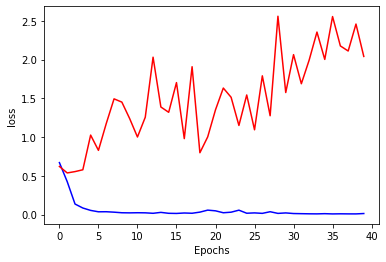

In [47]:
# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

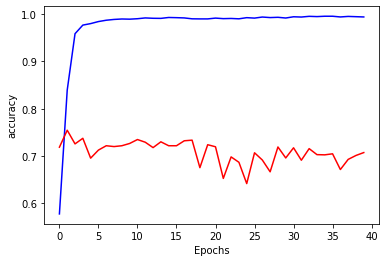

In [48]:
# Visualization of accuracy training 
plt.plot(history.history["binary_accuracy"], color="b")
plt.plot(history.history["val_binary_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

Try to improve the results by using ExponentialDecay Method

In [49]:
initial_rate = 0.1

In [50]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [51]:
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

In [52]:
model.compile(optimizer=optimizer,
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [53]:
history = model.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
84/84 [==============================] - 2s 14ms/step - loss: 0.8360 - binary_accuracy: 0.6375 - val_loss: 0.6906 - val_binary_accuracy: 0.5582
Epoch 2/40
84/84 [==============================] - 1s 12ms/step - loss: 0.6831 - binary_accuracy: 0.5757 - val_loss: 0.6869 - val_binary_accuracy: 0.5582
Epoch 3/40
84/84 [==============================] - 1s 11ms/step - loss: 0.6823 - binary_accuracy: 0.5757 - val_loss: 0.6873 - val_binary_accuracy: 0.5582
Epoch 4/40
84/84 [==============================] - 1s 12ms/step - loss: 0.6816 - binary_accuracy: 0.5757 - val_loss: 0.7062 - val_binary_accuracy: 0.5582
Epoch 5/40
84/84 [==============================] - 1s 12ms/step - loss: 0.6845 - binary_accuracy: 0.5757 - val_loss: 0.6885 - val_binary_accuracy: 0.5582
Epoch 6/40
84/84 [==============================] - 1s 13ms/step - loss: 0.6831 - binary_accuracy: 0.5757 - val_loss: 0.6875 - val_binary_accuracy: 0.5582
Epoch 7/40
84/84 [==============================] - 1s 12ms/step - los

Evaluation

In [54]:
# Visualization of loss training 
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show('iframe')

In [55]:
# Visualization of accuracy training 
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["binary_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_binary_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'    
)
fig.show('iframe')

In [56]:
#Using a LSTM model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [57]:
optimizer= tf.keras.optimizers.Adam(0.01)

In [58]:
model1.compile(optimizer=optimizer,
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [59]:
history = model1.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
84/84 [==============================] - 12s 77ms/step - loss: 0.5303 - binary_accuracy: 0.7452 - val_loss: 0.5246 - val_binary_accuracy: 0.7412
Epoch 2/40
84/84 [==============================] - 5s 61ms/step - loss: 0.2108 - binary_accuracy: 0.9259 - val_loss: 0.6283 - val_binary_accuracy: 0.7342
Epoch 3/40
84/84 [==============================] - 5s 61ms/step - loss: 0.0898 - binary_accuracy: 0.9707 - val_loss: 0.8085 - val_binary_accuracy: 0.7215
Epoch 4/40
84/84 [==============================] - 5s 61ms/step - loss: 0.0400 - binary_accuracy: 0.9850 - val_loss: 0.9889 - val_binary_accuracy: 0.7102
Epoch 5/40
84/84 [==============================] - 5s 63ms/step - loss: 0.0283 - binary_accuracy: 0.9897 - val_loss: 1.0548 - val_binary_accuracy: 0.6922
Epoch 6/40
84/84 [==============================] - 5s 61ms/step - loss: 0.0184 - binary_accuracy: 0.9925 - val_loss: 1.5767 - val_binary_accuracy: 0.7018
Epoch 7/40
84/84 [==============================] - 5s 61ms/step - lo

Evaluation

In [60]:
# Visualization of loss training 
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show('iframe')

In [61]:
# Visualization of accuracy training 
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["binary_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_binary_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'    
)
fig.show('iframe')

In [62]:
initial_rate = 0.1

In [63]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [64]:
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

In [65]:
model1.compile(optimizer=optimizer,
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [66]:
history = model1.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
84/84 [==============================] - 13s 79ms/step - loss: 0.1377 - binary_accuracy: 0.9567 - val_loss: 0.9663 - val_binary_accuracy: 0.6440
Epoch 2/40
84/84 [==============================] - 5s 63ms/step - loss: 0.4701 - binary_accuracy: 0.7885 - val_loss: 0.8196 - val_binary_accuracy: 0.6235
Epoch 3/40
84/84 [==============================] - 5s 65ms/step - loss: 0.5527 - binary_accuracy: 0.7257 - val_loss: 0.6915 - val_binary_accuracy: 0.6195
Epoch 4/40
84/84 [==============================] - 5s 64ms/step - loss: 0.5694 - binary_accuracy: 0.7180 - val_loss: 0.6867 - val_binary_accuracy: 0.6274
Epoch 5/40
84/84 [==============================] - 5s 65ms/step - loss: 0.5372 - binary_accuracy: 0.7356 - val_loss: 0.6559 - val_binary_accuracy: 0.6585
Epoch 6/40
84/84 [==============================] - 5s 64ms/step - loss: 0.5253 - binary_accuracy: 0.7519 - val_loss: 0.6706 - val_binary_accuracy: 0.6357
Epoch 7/40
84/84 [==============================] - 5s 63ms/step - lo

In [67]:
# Visualization of loss training 
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show('iframe')

In [68]:
# Visualization of accuracy training 
from plotly import graph_objects as go
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["binary_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_binary_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'    
)
fig.show('iframe')

Conclusion:
loss and val_loss used in both models are too high: it is better to use an NLP model like BERT which could be more efficient
- Improve preprocessing or do it differently
- Transfer learning with a BERT model